### Today concept
1. Classification models
1. K-Nearest Neibour classifier

#### Classification

if the target is discrete values then we can say it is classification


example finding person has cancer or not

email spam filter

student has pass or fail



we want predict given fruit is apple? or mandrain? or orange ? lemon?

**We want predict the which fruit it is from (apple/mandarin/orange/lemon)?**

**1. Get the data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fruit_data_with_colours.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
df.shape

(59, 7)

in this dataset fruit_label is our target column

**what are the avilable fruits in this data frame?**

In [4]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

**what is the count of each fruit in this dataset?**

In [5]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

**2. pre-processing**

is there any missing values?

In [6]:
df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.8+ KB


**we have to seperate the features and target**

In [8]:
X = df[['width','height']]

In [9]:
y = df['fruit_label']

**you have to visualize the fruits using width and height?**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

**3. train the model**

In [22]:
X_train.head(3)

,width,height
27,7.5,9.2
0,8.4,7.3
20,7.5,7.5


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier(n_neighbors=3)

In [14]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
print('training score',model.score(X_train,y_train)* 100)

training score 92.6829268292683


In [17]:
df.sample(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
9,1,apple,braeburn,172,7.4,7.0,0.89
30,3,orange,selected_seconds,158,7.1,7.5,0.79
33,3,orange,turkey_navel,190,7.5,8.1,0.74
36,3,orange,turkey_navel,160,7.1,7.6,0.76
58,4,lemon,unknown,118,6.1,8.1,0.70


In [18]:
# which type of fruit it is if width has 7.4 and height has 7
model.predict([   [ 7.4,7.0  ]     ])

array([1], dtype=int64)

In [19]:
model.predict([ [ 6.1,8.1 ] ])

array([4], dtype=int64)

In [20]:
model.predict([ [ 7.1,7.6  ] ])

array([3], dtype=int64)

In [21]:
print('testing score',model.score(X_test,y_test)*100)

testing score 72.22222222222221


In [23]:
from sklearn.metrics import accuracy_score

```
accuracy_score(y_actual,y_predict)
```

In [25]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)*100

72.22222222222221

In [33]:
accuracy_score(['cat','ant'] ,['cat','cat'])

0.5

**confusion_matrix**

In [34]:
from sklearn.metrics import confusion_matrix

```
confusion_matrix(y_true,y_predict)
```

In [37]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

In [38]:
confusion_matrix(y_true,y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

```
|
 |-----> predicted
 v
True      ant      bird     cat


ant        2        0       0


bird       0        0       1

 
cat        1        0       2
```

you given one person medial details to the model

actual person has No cancer  but model predicted it as person has cancer


#### prediction of breast cancer for person

**1. Get the data**

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [43]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [44]:
import pandas as pd

In [46]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**2. pre-processing**

In [47]:
df.shape

(569, 31)

In [48]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [49]:
X = df.drop('target',axis=1)
y = df['target']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [52]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model = KNeighborsClassifier(n_neighbors=3)

In [55]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [56]:
print('training score',model.score(X_train,y_train)* 100)

training score 95.47738693467338


In [57]:
print('testing score',model.score(X_test,y_test)*100)

testing score 92.39766081871345


**to find best k values**

In [62]:
K_values = [3,5,7,9,21,25,51]

In [63]:
scores = {}

In [64]:
for k in K_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    scores[k] = model.score(X_train,y_train) 

In [65]:
scores

{3: 0.9547738693467337,
 5: 0.949748743718593,
 7: 0.9472361809045227,
 9: 0.9472361809045227,
 21: 0.9396984924623115,
 25: 0.9371859296482412,
 51: 0.9120603015075377}

In [67]:
import matplotlib.pyplot as plt

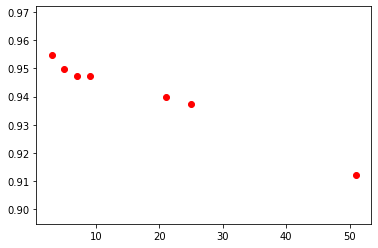

In [68]:
plt.figure()

plt.scatter(scores.keys(),scores.values(),c='red')

plt.show()

#### Task prediction flower it is from iris dataset

In [69]:
from sklearn.datasets import load_iris

In [70]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [71]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [72]:
import pandas as pd

In [74]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
df.shape

(150, 5)

In [76]:
df['target'].unique()

array([0, 1, 2], dtype=int64)

In [77]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

**2. pre-processing**

In [78]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


**we may apply visualisation to understand data**

In [80]:
import matplotlib.pyplot as plt

In [81]:
setosa = df[df['target']==0]
versicolour = df[df['target']==1]
virginica = df[df['target'] == 2]

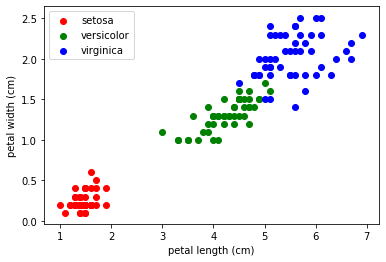

In [83]:
plt.figure()
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],c='red',label='setosa')
plt.scatter(versicolour['petal length (cm)'],versicolour['petal width (cm)'],c='green',label='versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],c='blue',label='virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [84]:
X = df[['petal length (cm)','petal width (cm)']]
y = df['target']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

**to find best k value**

In [92]:
K_values = [3,5,7,9,11,15,17,19,27]
scores = {}
for k in K_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    scores[k] = model.score(X_train,y_train)

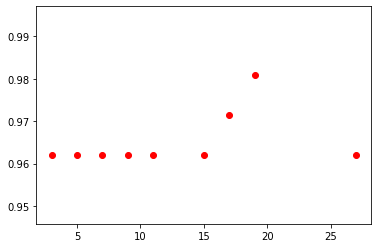

In [93]:
plt.figure()

plt.scatter(scores.keys(),scores.values(),c='red')

plt.show()

In [94]:
scores[19]

0.9809523809523809

In [96]:
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train,y_train)
print('training score',model.score(X_train,y_train)*100)
print('testing score',model.score(X_test,y_test)*100)

training score 98.09523809523809
testing score 91.11111111111111
